
<b>Presented by:</b>

Soasingarayar Abonia

M2-Artificial Intelligence-IA school



## Introduction
In this kernel, I would like to show some descriptive analysis of real estate data of France(territoire métropolitain et les DOM-TOM) except Alsace-Moselle and  Mayotte.Dataset was splited and arranged based on years.Here with this project we will use data from last 5 years i.e 2015,2016,2017,2018,2019.

This notebook comprises of data analysis of whole concatenated dataset which can be loaded from mysql server.Also a machine learning price detection.

# 1. Business Problem
## 1.1 Problem Context

For example,our client is a large Real Estate Investment Company,
* Where to invest
* Which is the best land type
* Which type of land type that we need to avoid

## 1.2 Problem Statement
The Client has hired us to find a data-driven approach to valuing properties.
* They currently have an untapped dataset of transaction prices for previous properties on the market.
* The data is collected in 2020.
* Our task is to analyse the data and come to the conclusion to solve the above mentioned problems


# 2. Data Analysis and Machine Learning Problem

## 2.1 Problem Context
- Breakdown of the different types of land (Pie chart - barplot)
- Distribution of the number of land sold according to the number of pieces
- Evolution of the number of sales according to the years
- Geographical distribution of the number of sold land in france

## 2.2 Type of Machine Learning Problem
It is a regression problem, where given the above set of features, we need to predict the transaction price(Valeur Fonciere) of the immeuble.

### 2.2 Performance Metric (KPI)
**Since it is a regression problem, we will use the following regression metrics:**
#### 2.2.1 Root Mean Squared Error (RMSE)
![title](Images/rmse.gif)
#### 2.2.2 R-squared
![title](Images/r_squared.png)

Just remember the value of R suared must be at least greater than 0 and 1 in the best case
#### 2.2.3 Mean Absolute Error (MAE):
![title](Images/mae.png)


# Exploratory data analysis

<b>Import the libraries</b>

In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns
import datetime as dt

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection  import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error as mae

#import xgboost
import os
from xgboost import XGBRegressor
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
#from sklearn.externals import joblib
sns.set(rc={'figure.figsize':(11.7,8.27)})

## 2. Dataset


Les fichiers de 2015 à 2019 sont à concaténer en un seul. Ces données correspondent aux transactions immobilières sur le territoire métropolitain et les DOM-TOM, à l’exception de l’Alsace-Moselle et de Mayotte. Les données contenues sont issues des actes notariés et des informations cadastrales.

![title](Images/DVF_info.jpg)

Les données présentes dans le fichier sont les suivantes :

1. <b>N° de disposition:</b> Quand un même acte de vente comporte plusieurs biens, plusieurs lignes de transactions seront enregistrées avec le même numéro de disposition. Il s'agit donc d'un identifiant unique d'un acte de vente.


2. <b>Date de mutation</b> Date de signature de l'acte de vente. elle est actuellement comprise entre le 1er janvier 2015 et le 31 décembre 2019 en attendant la mise à jour de nouvelles transactions immobilières.


3. <b>Nature de la mutation</b> Il s'agit du type de vente qui a eu lieu. Il peut s'agir d'une vente classique, d'une vente en l’état futur d’achèvement, d'une vente de terrain à bâtir, d'une adjudication, ou d'une expropriation ou échange.


4. <b>Valeur foncière</b> Montant de la vente. Ce montant ne comprend pas les frais de notaire et les frais d'agence car il correspond finalement à la valeur du bien vendu. Ce montant est TTC.


5. <b>Adresse</b> L'adresse exacte du bien est communiquée via plusieurs colonnes comme le numéro de voie, le code postal etc.


6. <b>Informations cadastrales</b> Des informations cadastrales sont fournies telles que le Numéro de section ou le numéro de plan.


7. <b>Lots et surfaces</b> Un lot de copropriété est constitué d’une partie privative (appartement, cave, etc.) et d’une quote-part de partie commune (tantièmes). Seuls les 5 premiers lots sont mentionnés. Si le nombre de lots est supérieur à 5, ils ne sont pas restitués.


8. <b>Nombre de lots</b> Nombre total de lots par disposition.

9. <b>Type de local</b> Il peut s'agir d'une maison, d'un appartement, d'une dépendance (isolée), ou d'un local industriel et commercial ou assimilés.


10. <b>Surface réelle bâti</b> Il s'agit de la surface réelle mesurée au sol entre les murs.


11. <b>Nombre de pièces principales</b> nombre de pièces principales du bien immobilier.


12. <b>Nature culture</b> Pour les terrains une nature de culture est renseignée afin de connaître son utilisation. Les types de terrains possible sont : terrains a bâtir, terrains d'agrément, bois, futaies feuillues, futaies mixtes, oseraies, peupleraies, futaies résineuses, taillis sous futaie, taillis simples, carrières, chemin de fer, eaux, jardins, landes, landes boisées, prés, pâtures, pacages, prés d'embouche, herbages, prés plantes, sols, terres, terres plantées, vergers, vignes


13. <b>Surface Terrain</b> Surface cadastrale du terrain.

In [2]:
#import pymysql in order to connect with mysql database
import pymysql.cursors

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='',
                             db='dvf',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)         

In [3]:
dvf_data = pd.read_sql_query(
    "select * from dvf_data;",
    connection)

In [4]:
dvf_data.shape

(3076888, 43)

In [5]:
dvf_data.dtypes

Code service CH               float64
Reference document            float64
1 Articles CGI                float64
2 Articles CGI                float64
3 Articles CGI                float64
4 Articles CGI                float64
5 Articles CGI                float64
No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere                object
No voie                       float64
B/T/Q                          object
Type de voie                   object
Code voie                      object
Voie                           object
Code postal                   float64
Commune                        object
Code departement               object
Code commune                  float64
Prefixe de section            float64
Section                        object
No plan                       float64
No Volume                      object
1er lot                        object
Surface Carrez du 1er lot      object
2eme lot    

In [6]:
dvf_data.head()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,05/01/2015,Vente,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,P,NaN,82.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,09/01/2015,Vente,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,AB,NaN,1550.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,05/01/2015,Vente,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,P,NaN,4.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,07/01/2015,Vente,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,P,NaN,298.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/01/2015,Vente,...,NaN,0.0,3.0,DÃ©pendance,NaN,0.0,0.0,S,NaN,195.0


## Distributions of numeric features
One of the most enlightening data exploration tasks is plotting the distributions of  features.

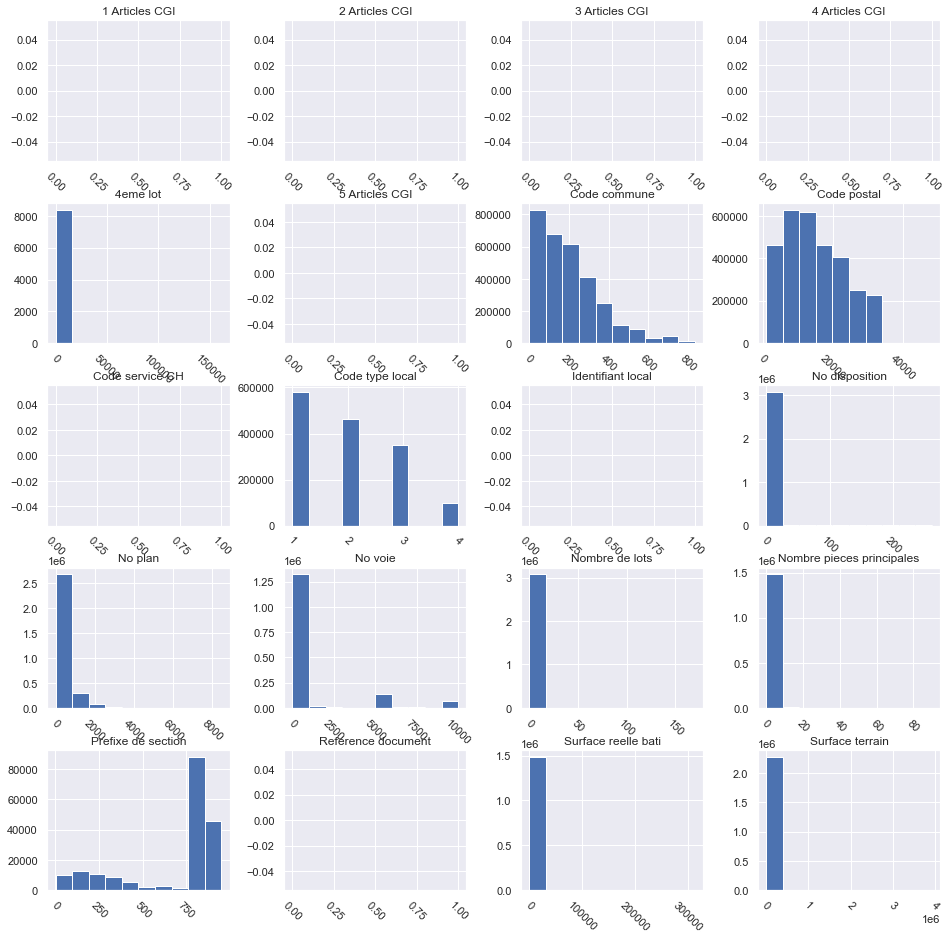

In [7]:
# Plot histogram grid
dvf_data.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [8]:
dvf_data.describe()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,No voie,Code postal,Code commune,Prefixe de section,No plan,4eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.076888e+06,1.575846e+06,3.057966e+06,3.076887e+06,187994.000000,3.076887e+06,8412.000000,3.076887e+06,1.491087e+06,0.0,1.488424e+06,1.488424e+06,2.279201e+06
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.287071e+00,1.028964e+03,1.476380e+04,1.998572e+02,676.479930,4.104906e+02,184.356515,3.253418e-01,1.976328e+00,NaN,8.712031e+01,2.400677e+00,3.222119e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.592842e+00,2.369555e+03,8.785117e+03,1.583823e+02,284.038134,5.420098e+02,2586.095787,7.794849e-01,9.407944e-01,NaN,6.912837e+02,2.066360e+00,1.377003e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,1.000000e+03,1.000000e+00,1.000000,1.000000e+00,2.000000,0.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,9.000000e+00,6.830000e+03,7.800000e+01,469.000000,9.100000e+01,7.000000,0.000000e+00,1.000000e+00,NaN,1.400000e+01,0.000000e+00,2.500000e+02
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.800000e+01,1.353000e+04,1.720000e+02,825.000000,2.270000e+02,17.000000,0.000000e+00,2.000000e+00,NaN,6.000000e+01,2.000000e+00,7.010000e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.650000e+02,2.210000e+04,2.830000e+02,855.000000,5.080000e+02,61.000000,1.000000e+00,3.000000e+00,NaN,9.400000e+01,4.000000e+00,2.200000e+03
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+02,9.999000e+03,4.825000e+04,8.340000e+02,950.000000,8.456000e+03,161313.000000,1.700000e+02,4.000000e+00,NaN,3.129620e+05,9.000000e+01,3.923036e+06


In [9]:
#Columns in our dataset
dvf_data.columns

Index(['Code service CH', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

### Count Plot


<AxesSubplot:title={'center':'Land Type'}, xlabel='count', ylabel='Type local'>

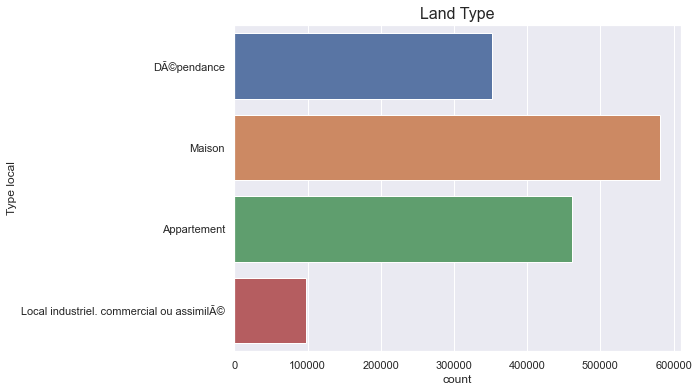

In [10]:
#Plot to show counts of property type
plt.figure(figsize=(8,6))
plt.title('Land Type',fontsize="16")
sns.countplot(y='Type local', data=dvf_data)

From above plot we can conclude the overall count of different type of property that exist.count of houses for sale is high relative to the appartment and other land types

<AxesSubplot:title={'center':'Nature Mutation'}, xlabel='count', ylabel='Nature mutation'>

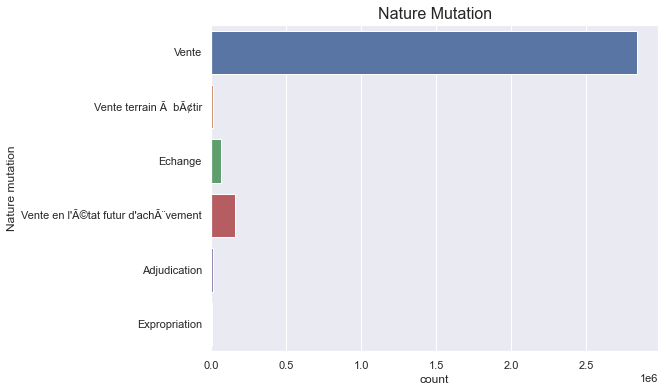

In [11]:
#Plot to show counts of Nature mutation
plt.figure(figsize=(8,6))
plt.title('Nature Mutation',fontsize="16")
sns.countplot(y='Nature mutation', data=dvf_data)

From above plot we can conclude the overall count of different nature mutation that exist.So most of the properties are in the stage of selling.

<AxesSubplot:title={'center':'Nature Culture'}, xlabel='count', ylabel='Nature culture'>

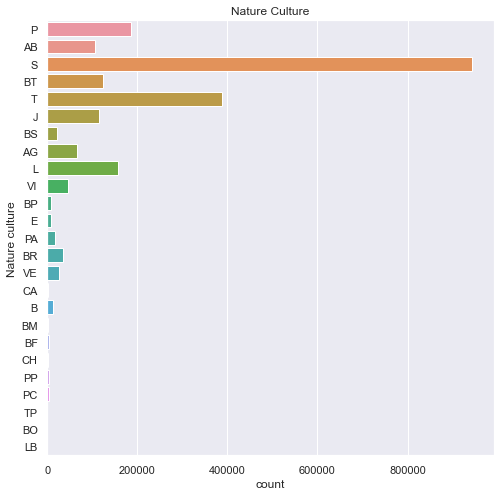

In [12]:
plt.figure(figsize=(8,8))
plt.title('Nature Culture')
sns.countplot(y='Nature culture', data=dvf_data)

Above plot depict the  count of nature culture of land.So we can conclude the soil land,lands,pasture are mostly in sale.
Garden,building land,amenity lands are next good selling proeprty.

<AxesSubplot:title={'center':'Number of lots'}, xlabel='count', ylabel='Nombre de lots'>

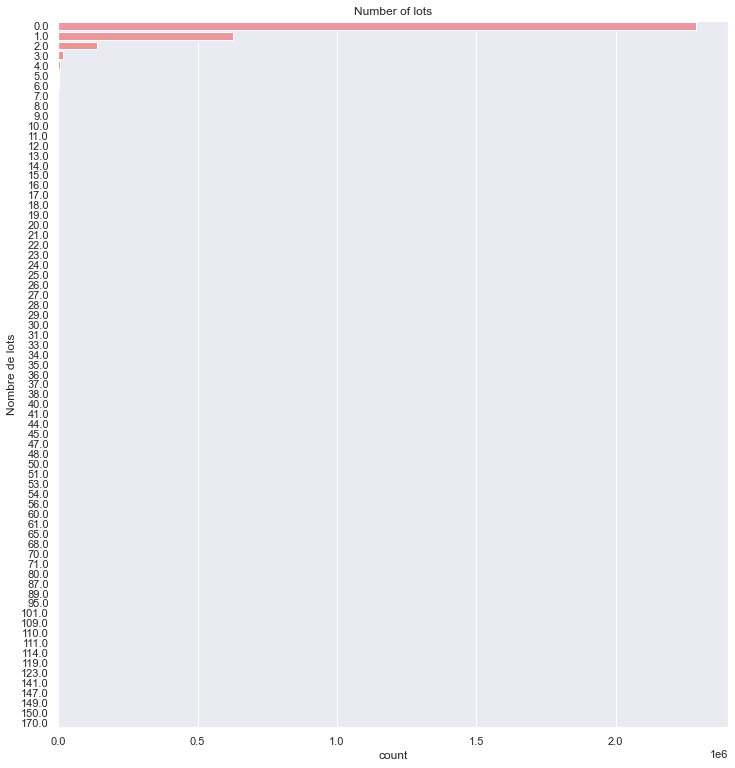

In [13]:
plt.figure(figsize=(12,13))
plt.title('Number of lots')
sns.countplot(y='Nombre de lots', data=dvf_data)

Count of lot 0,1 and 2 are higher than other number of lots

## Repartition with Pie Chart

<AxesSubplot:title={'center':'Distribution Diagram of land Type'}, ylabel='Type local'>

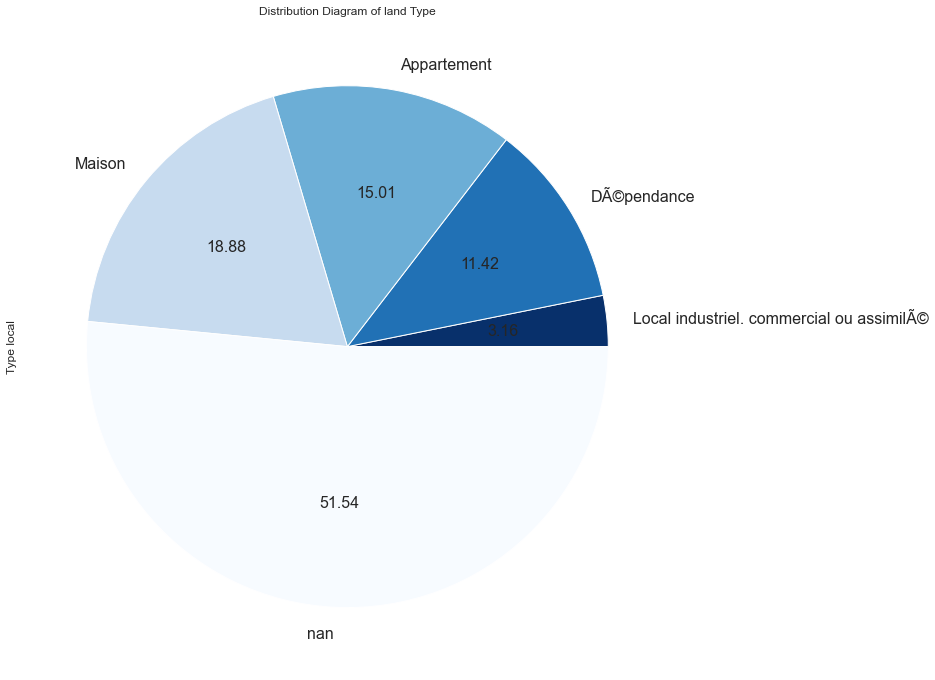

In [14]:
from collections import Counter
property_type = dvf_data['Type local']
r = Counter(property_type)

# get the dataframe with property type  count
property_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
property_df.columns = ['Type local']

# Plot using distribution diagram to find the distribution of property type 
property_df.plot.pie(y = 'Type local', 
                 colormap = 'Blues_r',
                 figsize = (12, 12),
                 fontsize = 16, 
                 autopct = '%.2f',
                 legend = False,
                 title = 'Distribution Diagram of land Type')

Repartition of land type using pie chart.Most of the land types are empty with dvf dataset so the house types are mostly in sale.

<AxesSubplot:title={'center':'Distribution Diagram of Nature mutation'}, ylabel='Nature mutation'>

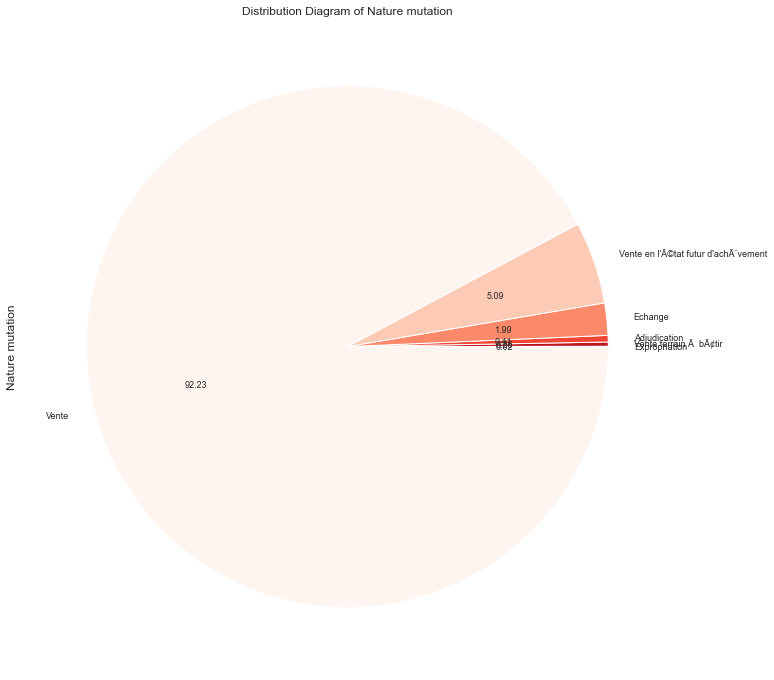

In [15]:
mutation_type = dvf_data['Nature mutation']
r = Counter(mutation_type)

# get the dataframe with Nature mutation count
mutation_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
mutation_df.columns = ['Nature mutation']

# Plot using distribution diagram to find the distribution of Nature mutation 
mutation_df.plot.pie(y = 'Nature mutation', 
                 colormap = 'Reds_r',
                 figsize = (12, 12),
                 fontsize = 9, 
                 autopct = '%.2f',
                 legend = False,
                 title = 'Distribution Diagram of Nature mutation')

<AxesSubplot:title={'center':'Number of rooms'}, xlabel='count', ylabel='Nombre pieces principales'>

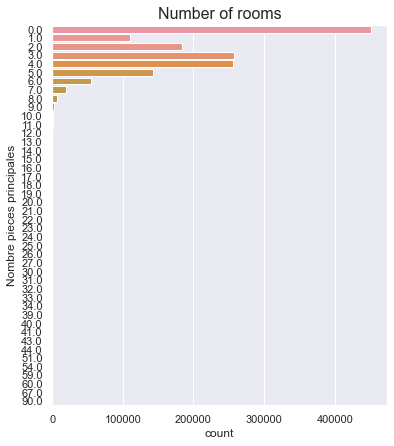

In [16]:
#Plot to show counts of number of rooms
plt.figure(figsize=(6,7))
plt.title('Number of rooms',fontsize="16")
sns.countplot(y='Nombre pieces principales', data=dvf_data)

<AxesSubplot:title={'center':'Number of rooms in the house which are in the process of future completion'}, xlabel='count', ylabel='Nombre pieces principales'>

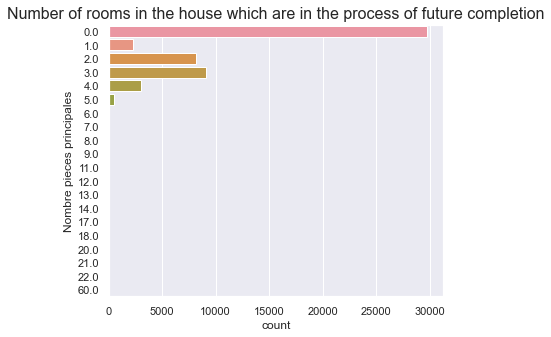

In [17]:
#Plot to show Number of rooms in the house which are in the process of future completion
NM = dvf_data['Nature mutation'].str.contains('futur')
plt.figure(figsize=(6,5))
plt.title('Number of rooms in the house which are in the process of future completion',fontsize="16")
sns.countplot(y='Nombre pieces principales', data=dvf_data[NM])

<AxesSubplot:title={'center':'Distribution Diagram of land type in the future sale'}, ylabel='Type local'>

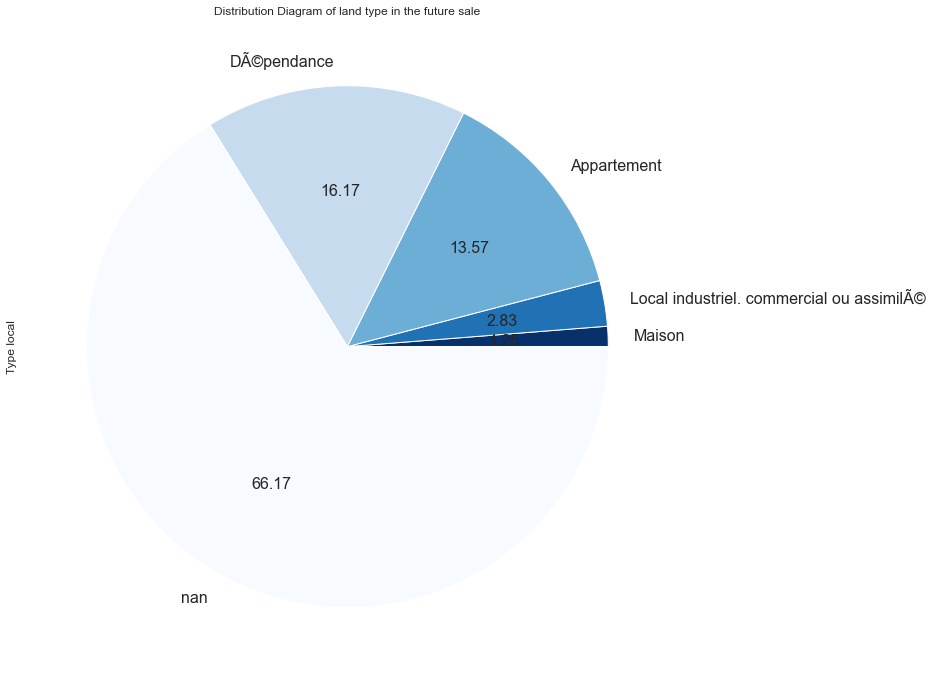

In [18]:
#Distribution of land in future completion sale
from collections import Counter
property_type=dvf_data[NM]
property_type = property_type['Type local']
r = Counter(property_type)

# get the dataframe with Property type
property_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
property_df.columns = ['Type local']

# Plot using distribution diagram to find the distribution of property type 
property_df.plot.pie(y = 'Type local', 
                 colormap = 'Blues_r',
                 figsize = (12, 12),
                 fontsize = 16, 
                 autopct = '%.2f',
                 legend = False,
                 title = 'Distribution Diagram of land type in the future sale')

In [19]:
#sns.scatterplot(x=dvf_data['Surface terrain'], y=dvf_data['Valeur fonciere']);

In [20]:
#Unique values in Nature mutation
dvf_data['Nature mutation'].unique().tolist()

['Vente',
 'Vente terrain Ã  bÃ¢tir',
 'Echange',
 "Vente en l'Ã©tat futur d'achÃ¨vement",
 'Adjudication',
 'Expropriation']

In [21]:
#NPP_df = dvf_data[dvf_data['Nombre pieces principales'].notna()]
#NPP_df = dvf_data.dropna(subset=['Nombre pieces principales'])
#NPP_df = dvf_data[dvf_data['Nombre pieces principales'].notnull()]
NP_df = dvf_data[pd.notnull(dvf_data['Nombre pieces principales'])]

In [22]:
#replacing to decimal values 
dvf_data['Valeur fonciere']=dvf_data['Valeur fonciere'].replace('\D', '.', regex=True).astype(float)
dvf_data['Valeur fonciere']

0             120.0
1           12400.0
2             110.0
3             180.0
4           95000.0
5           95000.0
6          219000.0
7             800.0
8           85000.0
9           78000.0
10          78000.0
11         239700.0
12         239700.0
13         239700.0
14         239700.0
15         239700.0
16          91000.0
17          91000.0
18          91000.0
19          91000.0
20         559500.0
21         559500.0
22         260000.0
23         210000.0
24          50000.0
25         170695.0
26           1000.0
27          65000.0
28          65000.0
29          65000.0
             ...   
3076858    512000.0
3076859    295000.0
3076860    260000.0
3076861    304500.0
3076862    304500.0
3076863    143000.0
3076864    143000.0
3076865    143000.0
3076866      1000.0
3076867    620000.0
3076868    620000.0
3076869    620000.0
3076870    620000.0
3076871    620000.0
3076872    620000.0
3076873    620000.0
3076874    620000.0
3076875    620000.0
3076876    620000.0


<AxesSubplot:title={'center':'Outliers Type local by land surface'}, xlabel='Surface terrain', ylabel='Type local'>

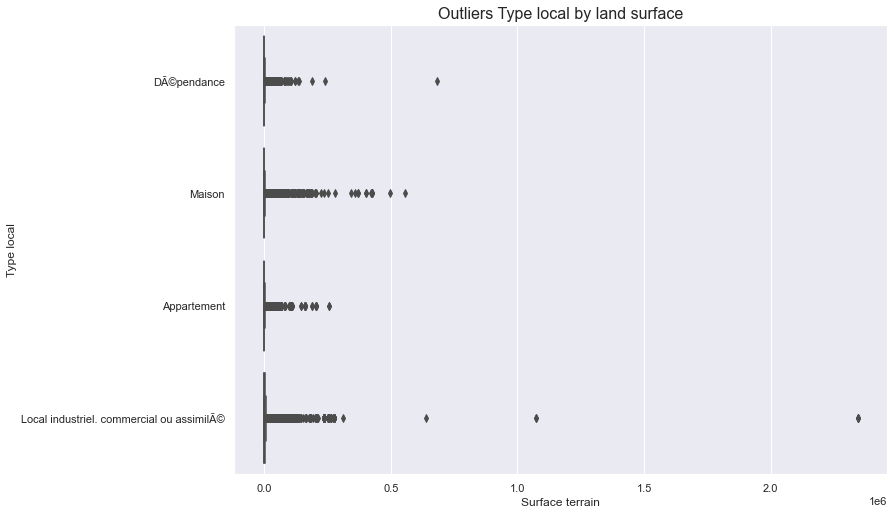

In [23]:
plt.title('Outliers Type local by land surface',fontsize="16")
sns.boxplot(y='Type local', x='Surface terrain', data=dvf_data)

In [24]:
dvf_data=dvf_data.dropna(axis=1, how='all')

In [25]:
dvf_data.groupby('Type local').agg([np.mean, np.std])

No disposition            \
                                                    mean       std   
Type local                                                           
Appartement                                     1.220339  2.086007   
DÃ©pendance                                     1.079308  1.119242   
Local industriel. commercial ou assimilÃ©       1.088143  0.699658   
Maison                                          1.108077  1.398805   

                                          Valeur fonciere                \
                                                     mean           std   
Type local                                                                
Appartement                                  1.010000e+06  5.591078e+06   
DÃ©pendance                                  6.779950e+05  4.381706e+06   
Local industriel. commercial ou assimilÃ©    8.251743e+05  3.467671e+06   
Maison                                       4.226335e+05  5.836681e+06   

                                               No voie               \
                                                  mean          std   
Type local                                                            
Appartement                                 785.055826  2214.898139   
DÃ©pendance                                1116.031305  2582.458167   
Local industriel. commercial ou assimilÃ©  1497.721857  2850.644762   
Maison                                     1243.390807  2398.713451   

                                            Code postal               \
                                                   mean          std   
Type local                                                             
Appartement                                13402.738368  8483.529693   
DÃ©pendance                                13184.702927  8617.577760   
Local industriel. commercial ou assimilÃ©  14514.255416  8842.478231   
Maison                                     15696.218364  8965.899069   

                                          Code commune              ...  \
                                                  mean         std  ...   
Type local                                                          ...   
Appartement                                 167.790723  147.558820  ...   
DÃ©pendance                                 170.782295  152.830296  ...   
Local industriel. commercial ou assimilÃ©   191.673685  157.134043  ...   
Maison                                      218.579622  168.239915  ...   

                                          Nombre de lots            \
                                                    mean       std   
Type local                                                           
Appartement                                     1.148396  0.883483   
DÃ©pendance                                     0.780263  0.462500   
Local industriel. commercial ou assimilÃ©       0.725817  2.754611   
Maison                                          0.048196  0.291815   

                                          Code type local       \
                                                     mean  std   
Type local                                                       
Appartement                                           2.0  0.0   
DÃ©pendance                                           3.0  0.0   
Local industriel. commercial ou assimilÃ©             4.0  0.0   
Maison                                                1.0  0.0   

                                          Surface reelle bati               \
                                                         mean          std   
Type local                                                                   
Appartement                                         57.285998    31.356846   
DÃ©pendance                                          0.009710     0.753314   
Local industriel. commercial ou assimilÃ©          461.345758  2708.074976   
Maison                                             102.655853    49.734965

<AxesSubplot:title={'center':'Coorellation Matrix of DVF data'}>

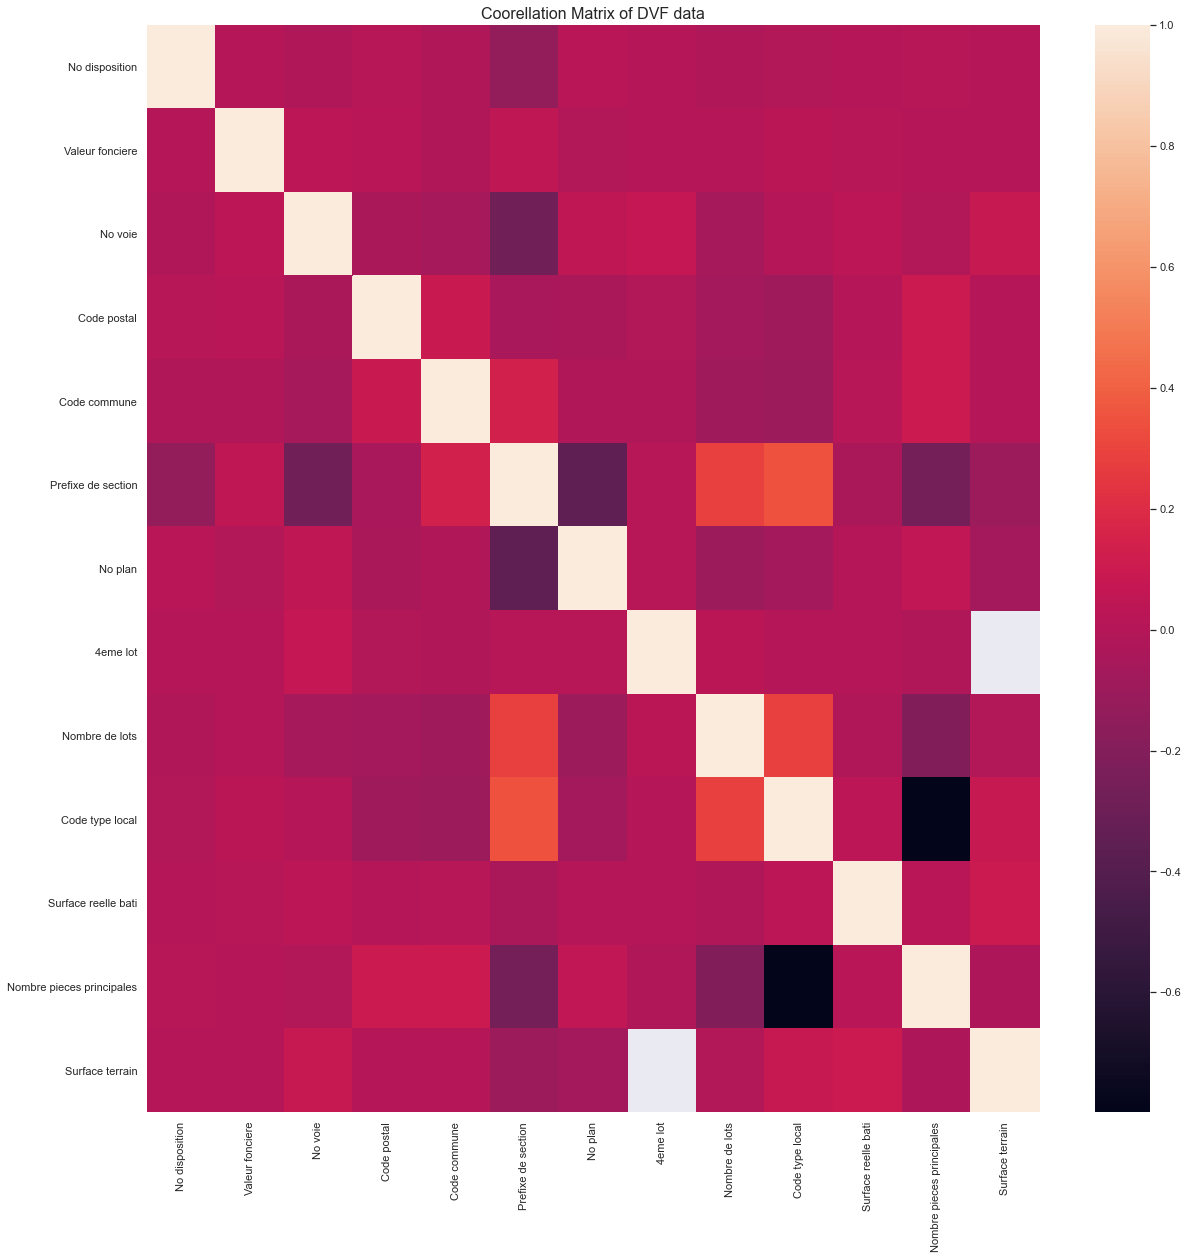

In [26]:
plt.figure(figsize=(20,20))
plt.title('Coorellation Matrix of DVF data',fontsize="16")
sns.heatmap(dvf_data.corr())

<b>What to look for?</b>

The colorbar on the right explains the meaning of the heatmap - Dark colors indicate strong negative correlations and light colors indicate strong positive correlations.

Perhaps the most helpful way to interpret this correlation heatmap is to first find features that are correlated with our target variable by scanning the first column.

In this case, it doesn't look like many features are strongly correlated with the target variable(Valeur fonciere).

Example: there is a strong negative correlation between code type Local and Nombre pieces principles, or No Plan and prefixe de section

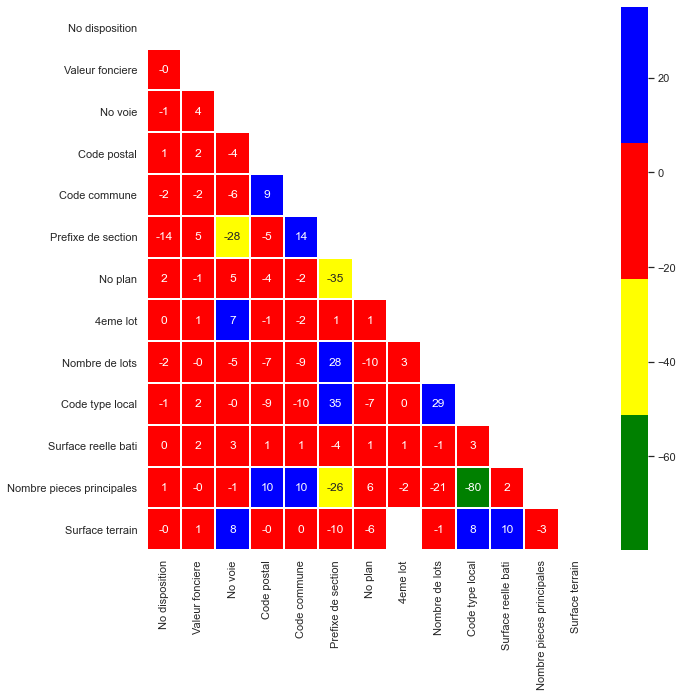

In [27]:
mask=np.zeros_like(dvf_data.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(dvf_data.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

In [28]:
df = dvf_data.drop_duplicates()
print( df.shape )

(2991818, 35)


In [29]:
df_date=df

<AxesSubplot:xlabel='Date mutation'>

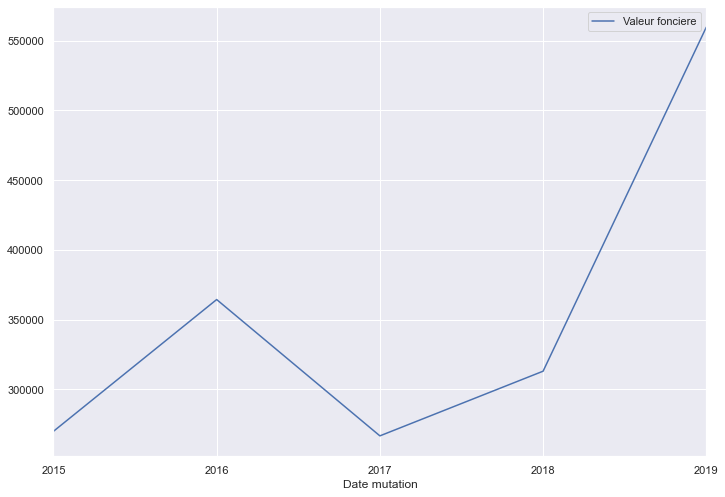

In [30]:
#Convert date mutation to datetime
df_date['Date mutation'] = pd.to_datetime(df_date['Date mutation'])
df_date = df_date.set_index("Date mutation")
df_VF=df_date[['Valeur fonciere']]
#Plot land value by year
df_VF.resample('Y').mean().plot() 

From the above plot we can conclude that mean land value is increasing by year 

<AxesSubplot:xlabel='Date mutation'>

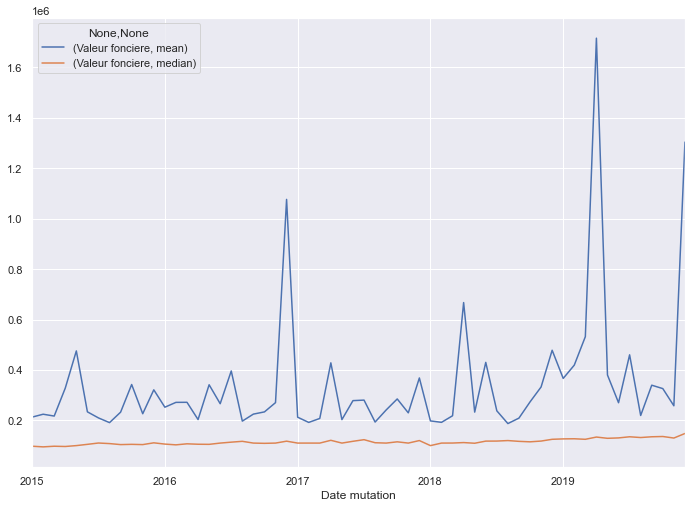

In [31]:
#Plot mean and median land value by month
df_VF.resample('M').agg(['mean', 'median']).plot()

    Here in above plot we computed the monthly mean land value.As like the previous plot we can say the scenerio here shows the land value increase with year

<AxesSubplot:xlabel='Date mutation'>

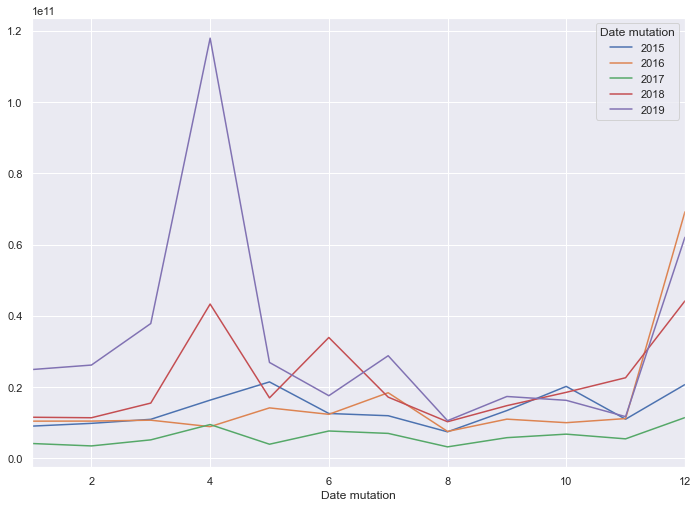

In [32]:
#Plot land value by month for different year 
pv = pd.pivot_table(df_VF, index=df_VF.index.month, columns=df_VF.index.year,
                    values='Valeur fonciere', aggfunc='sum')
pv.plot()

Summing up the Land Value by month for different years(2015,2016,2017,2018,2019).From this graph we can conclude the land value are quite high in the first half-year as compared to last hal-year

In [33]:
pv

Date mutation,2015,2016,2017,2018,2019
Date mutation,,,,,
1,9.072685e+09,1.046324e+10,4.190554e+09,1.156288e+10,2.495124e+10
2,9.846638e+09,1.048237e+10,3.514748e+09,1.142098e+10,2.620536e+10
3,1.098181e+10,1.073628e+10,5.215364e+09,1.553687e+10,3.786123e+10
4,1.636564e+10,8.922612e+09,9.514896e+09,4.332774e+10,1.179371e+11
5,2.147683e+10,1.418936e+10,3.991263e+09,1.700189e+10,2.694105e+10
6,1.261841e+10,1.238121e+10,7.702335e+09,3.394612e+10,1.760831e+10
7,1.198675e+10,1.844191e+10,7.030073e+09,1.720670e+10,2.882552e+10
8,7.469330e+09,7.581629e+09,3.249631e+09,1.029921e+10,1.059396e+10
9,1.344032e+10,1.102838e+10,5.831119e+09,1.481377e+10,1.738797e+10



## Box Plot to find Outliers in Feature variables
    Outliers can cause problems with certain types of models.
    Boxplots are a nice way to detect outliers
    Let's start with a box plot of feature variable
This type of graph is used to show the shape of the distribution, its central value, and its variability

### Interpretation

The two vertical bars on the ends are the min and max values. 
The box in the middle is the interquartile range (25th percentile to 75th percentile).
Half of all observations fall in that box.
Finally, the vertical bar in the middle of the box is the median.

<AxesSubplot:xlabel='Nombre de lots'>

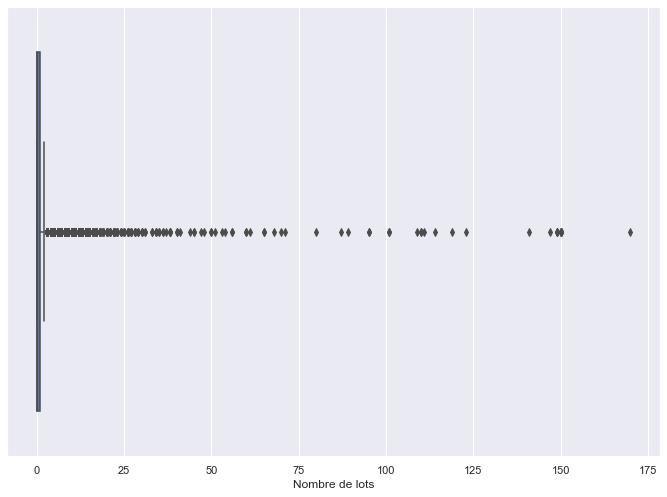

In [34]:
sns.boxplot(df['Nombre de lots'])

Above graph shows number of lots value changes from 0 to 175

<AxesSubplot:xlabel='Valeur fonciere'>

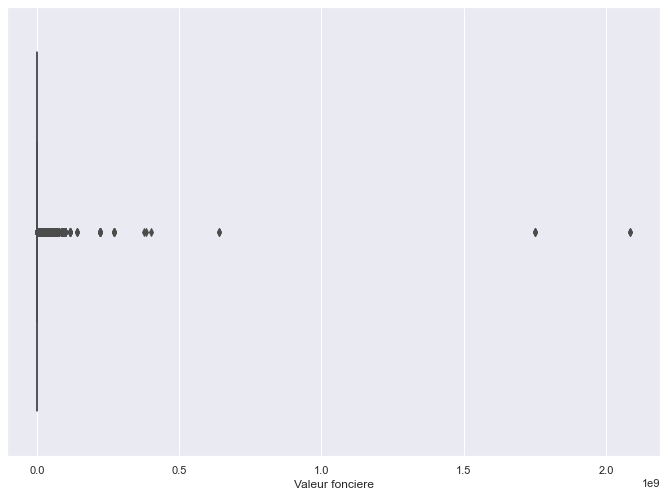

In [35]:
sns.boxplot(df['Valeur fonciere'])

Text(0.5, 1.0, 'Number of rooms ')

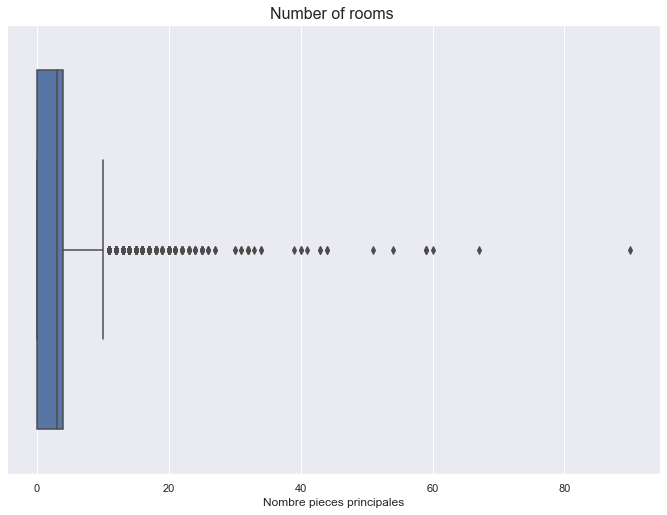

In [36]:
## Checking outliers in number of  principales pieces
sns.boxplot(df['Nombre pieces principales'])
plt.title("Number of rooms ",fontsize=16)

In [37]:
df['Nombre de lots'].unique()

array([  0.,   1.,   2.,   6.,   4.,   3.,  95.,   7.,  22.,   9.,   5.,
         8.,  13.,  10.,  14.,  11.,  15.,  26.,  17.,  53., 109.,  87.,
        38.,  23.,  12.,  71.,  18.,  60.,  56.,  19.,  35.,  28., 149.,
       147., 150., 110.,  24., 111.,  27.,  25.,  16.,  20.,  30., 123.,
        nan,  36.,  68.,  80.,  31.,  34.,  29., 170.,  33.,  50.,  40.,
        41.,  70., 114.,  21.,  51.,  44.,  45.,  89.,  48., 119.,  61.,
        37., 101.,  54., 141.,  65.,  47.])

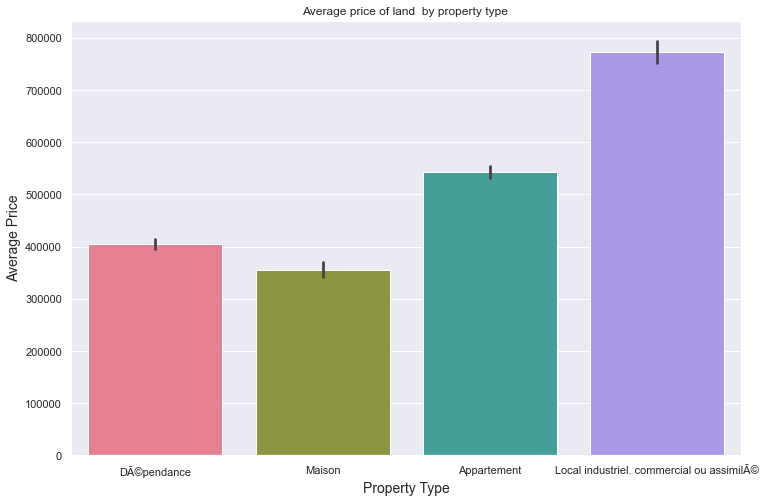

In [38]:
# barplot for price based on property type 
fig, ax = plt.subplots(figsize=(12,8))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="Type local", y="Valeur fonciere", palette="husl",data=df)
ax.set_title("Average price of land  by property type ",fontdict= {'size':12})
ax.xaxis.set_label_text("Property Type",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

Above plot shows the average land price for industrial lands property type is high than other property type

In [39]:
df.groupby(['Nature mutation'])['Nombre pieces principales'].count()

Nature mutation
Adjudication                               7692
Echange                                    3971
Expropriation                                92
Vente                                   1352313
Vente en l'Ã©tat futur d'achÃ¨vement      52563
Vente terrain Ã  bÃ¢tir                     776
Name: Nombre pieces principales, dtype: int64

In [40]:
df.groupby(['Nature mutation', 'Nombre pieces principales'])['Nombre pieces principales'].count()

Nature mutation                       Nombre pieces principales
Adjudication                          0.0                          2298
                                      1.0                           717
                                      2.0                          1091
                                      3.0                          1309
                                      4.0                          1147
                                      5.0                           656
                                      6.0                           267
                                      7.0                           121
                                      8.0                            46
                                      9.0                             8
                                      10.0                           12
                                      11.0                            6
                                      12.0                            2


In [41]:
arr = df[['Nature mutation','Nombre pieces principales']].groupby('Nature mutation').count().round().sort_values(by='Nature mutation', ascending= True)
arr.reset_index(inplace=True)
arr.head()

,Nature mutation,Nombre pieces principales
0,Adjudication,7692
1,Echange,3971
2,Expropriation,92
3,Vente,1352313
4,Vente en l'Ã©tat futur d'achÃ¨vement,52563


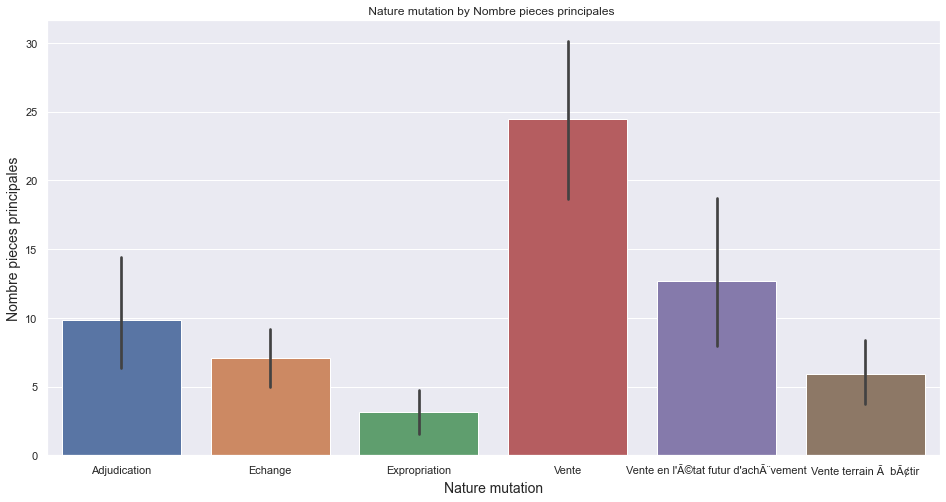

In [42]:
peice_df=df.groupby(['Nature mutation', 'Nombre pieces principales']).count().reset_index()
# barplot for price based on number of principle pieces  
fig, ax = plt.subplots(figsize=(16,8))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="Nature mutation", y="Nombre pieces principales",  data=peice_df)
ax.set_title(" Nature mutation by Nombre pieces principales  ",fontdict= {'size':12})
ax.xaxis.set_label_text("Nature mutation",fontdict= {'size':14})
ax.yaxis.set_label_text("Nombre pieces principales",fontdict= {'size':14})
plt.show()

Average number of rooms by Nature mutation.So property with many rooms are in sale 

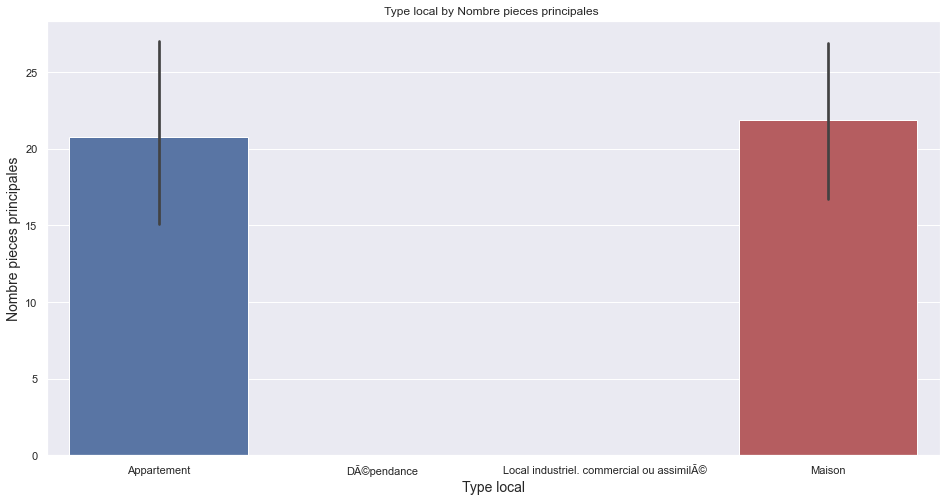

In [43]:
peice_df=df.groupby(['Type local', 'Nombre pieces principales']).count().reset_index()
# barplot for price based on number of principle pieces  
fig, ax = plt.subplots(figsize=(16,8))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="Type local", y="Nombre pieces principales",  data=peice_df)
ax.set_title(" Type local by Nombre pieces principales  ",fontdict= {'size':12})
ax.xaxis.set_label_text("Type local",fontdict= {'size':14})
ax.yaxis.set_label_text("Nombre pieces principales",fontdict= {'size':14})
plt.show()

From the above bar plot as we expected there is only rooms in appartement and houses but not in other property type.

In [44]:
df_mutation=df

In [45]:
df_mutation['Date mutation'] = pd.to_datetime(df_mutation['Date mutation'])
df_mutation['year'] = df_mutation['Date mutation'].dt.year

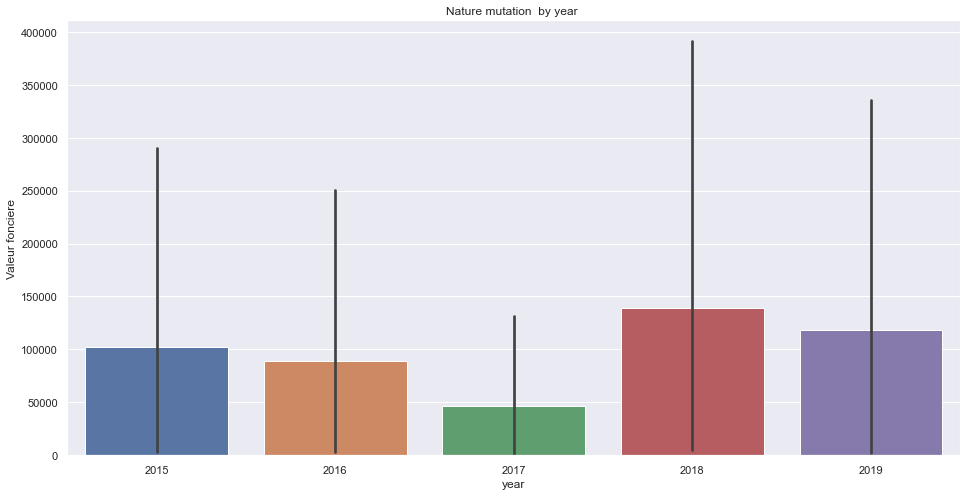

In [46]:
mutation_df=df_mutation.groupby(['year','Nature mutation']).count().reset_index()

#print(mutation_df.head())
# barplot for price based on number of principle pieces  
fig, ax = plt.subplots(figsize=(16,8))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="year", y="Valeur fonciere",  data=mutation_df)
ax.set_title("Nature mutation  by year ",fontdict= {'size':12})
#ax.xaxis.set_label_text("Nature mutation",fontdict= {'size':14})
#ax.yaxis.set_label_text("year",fontdict= {'size':14})
plt.show()

In [47]:
mutation_df=df_mutation.groupby(['year','Nature mutation']).count().reset_index()
print(mutation_df.head())  

   year                       Nature mutation  No disposition  Date mutation  \
0  2015                          Adjudication            3474           3474   
1  2015                               Echange           14135          14135   
2  2015                         Expropriation             199            199   
3  2015                                 Vente          566334         566334   
4  2015  Vente en l'Ã©tat futur d'achÃ¨vement           27738          27738   

   Valeur fonciere  No voie  B/T/Q  Type de voie  Code voie    Voie  ...  \
0             3468     2138    148          1902       3473    3467  ...   
1            14119     1186     82          1360      14135   14108  ...   
2              199       76      1           115        199     199  ...   
3           565691   274616  20989        244095     566249  565260  ...   
4            27736    12552    791         17627      24942   24938  ...   

   5eme lot  Surface Carrez du 5eme lot  Nombre de lots  Code 

# Machine Learning Models
## Data Preparation
As we have already remove duplicates from our data so now we will check for null values and need to manage missing values in data.
1. Remove  columns which are mostly empty 
2. Number of rooms is null i.e there is no room so we fill nan with 0
3. Our target feature 'Land value' is nan so in order to work with scikit we filter the rows with no nan value for column 'Valeur Fonciere'
4. Label missing categorical data

In [48]:
print(df.shape)

(2991818, 36)


In [49]:
# Display number of missing values by categorical feature
df.select_dtypes(include=['object']).isnull().sum()

Nature mutation                     0
B/T/Q                         2879192
Type de voie                  1591855
Code voie                       17543
Voie                            18650
Commune                          1025
Code departement                    1
Section                           177
No Volume                     2986651
1er lot                       2209032
Surface Carrez du 1er lot     2773050
2eme lot                      2829607
Surface Carrez du 2eme lot    2933926
3eme lot                      2967567
Surface Carrez du 3eme lot    2986869
Surface Carrez du 4eme lot    2990513
5eme lot                      2987982
Surface Carrez du 5eme lot    2991276
Type local                    1572030
Nature culture                 791420
Nature culture speciale       2861258
dtype: int64

In [50]:
df.isnull().sum()

No disposition                      0
Date mutation                       0
Nature mutation                     0
Valeur fonciere                 23087
No voie                       1486851
B/T/Q                         2879192
Type de voie                  1591855
Code voie                       17543
Voie                            18650
Code postal                     18862
Commune                          1025
Code departement                    1
Code commune                        1
Prefixe de section            2809566
Section                           177
No plan                             1
No Volume                     2986651
1er lot                       2209032
Surface Carrez du 1er lot     2773050
2eme lot                      2829607
Surface Carrez du 2eme lot    2933926
3eme lot                      2967567
Surface Carrez du 3eme lot    2986869
4eme lot                      2983582
Surface Carrez du 4eme lot    2990513
5eme lot                      2987982
Surface Carr

In [51]:
# Remove  columns which are mostly empty  
df_processed=df.drop(['B/T/Q', 'No Volume','Section','Prefixe de section','Surface reelle bati','Commune','Code type local','Type de voie','Code departement','Voie','No voie','Code voie','1er lot', 'Surface Carrez du 1er lot', '2eme lot','Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot','4eme lot', 'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot', 'Nature culture speciale'], axis = 1) 

In [52]:
#number of rooms is null i.e there is no room so we fill nan with 0
df_processed["Nombre pieces principales"] = df_processed["Nombre pieces principales"].fillna(0)

In [53]:
#Delete row with null value
df_processed=df_processed.dropna(axis=0, subset=['Code commune', 'No plan','Nombre de lots'], thresh=1)
df_processed=df_processed.dropna(axis=0, subset=['Code postal','Surface terrain'])

In [54]:
#Our target feature 'Land value' is nan so in order to work with scikit we filter the rows with no nan value for column 'Valeur Fonciere'
df_processed = df_processed[pd.notnull(df_processed['Valeur fonciere'])]

In [55]:
# It is better to covert training set dates to numeric and train on that data
df_processed['Date mutation']=df_processed['Date mutation'].map(dt.datetime.toordinal)

<b>Label missing categorical data</b>

You cannot simply ignore missing values in your dataset. You must handle them in some way for the very practical reason that Scikit-Learn algorithms do not accept missing values.

<b>The best way to handle missing data for categorical features is to simply label them as 'Missing'</b>

In [56]:
df_processed['Nature culture'] = df_processed['Nature culture'].fillna('Missing')
df_processed['Type local'] = df_processed['Type local'].fillna('Missing')
#df_processed['Type de voie'] = df_processed['Type de voie'].fillna('Missing')

df_processed.select_dtypes(include=['object']).isnull().sum()

Nature mutation    0
Type local         0
Nature culture     0
dtype: int64

### Encode dummy variables (One Hot Encoding)

    Machine learning algorithms cannot directly handle categorical features. Specifically, they cannot handle text values.
    Therefore, we need to create dummy variables for our categorical features.
    Dummy variables are a set of binary (0 or 1) features that each represent a single class from a categorical feature

In [57]:
# Remove  columns which are mostly empty  
df_processed=df_processed.drop(['Nature mutation', 'No plan','No disposition','Nature culture'], axis = 1) 

In [58]:
# Create a new dataframe with dummy variables for for our categorical features.
#df_processed = pd.get_dummies(df_processed, columns=['Nature mutation', 'Nature culture', 'Type local'])
df_processed = pd.get_dummies(df_processed, columns=['Type local'])

In [59]:
df_processed.columns

Index(['Date mutation', 'Valeur fonciere', 'Code postal', 'Code commune',
       'Nombre de lots', 'Nombre pieces principales', 'Surface terrain',
       'year', 'Type local_Appartement', 'Type local_DÃ©pendance',
       'Type local_Local industriel. commercial ou assimilÃ©',
       'Type local_Maison', 'Type local_Missing'],
      dtype='object')

In [60]:
df_processed.isnull().sum()

Date mutation                                           0
Valeur fonciere                                         0
Code postal                                             0
Code commune                                            0
Nombre de lots                                          0
Nombre pieces principales                               0
Surface terrain                                         0
year                                                    0
Type local_Appartement                                  0
Type local_DÃ©pendance                                  0
Type local_Local industriel. commercial ou assimilÃ©    0
Type local_Maison                                       0
Type local_Missing                                      0
dtype: int64

In [61]:
df_processed.shape

(2178249, 13)

For to speed up execution time and avoid memory errors we will resample data...We will use the random sampled 10000 rows

In [62]:
df_processed=df_processed.sample(n=100000)

###  Train and Test Splits
Separate your dataframe into separate objects for the target variable (y) and the input features (X) and perform the train and test split

In [63]:
# Create separate object for target variable
y = df_processed['Valeur fonciere']
# Create separate object for input features
X = df_processed.drop('Valeur fonciere', axis=1)

In [64]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Let's confirm we have the right number of observations in each subset.

In [65]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 12) (20000, 12) (80000,) (20000,)


### Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [66]:
#train_mean = X_train.mean()
#train_std = X_train.std()

In [67]:
## Standardize the train data set
#X_train = (X_train - train_mean) / train_std

In [68]:
## Check for mean and std dev.
X_train.describe()

,Date mutation,Code postal,Code commune,Nombre de lots,Nombre pieces principales,Surface terrain,year,Type local_Appartement,Type local_DÃ©pendance,Type local_Local industriel. commercial ou assimilÃ©,Type local_Maison,Type local_Missing
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,736570.050438,15240.851237,213.388825,0.001687,1.123263,3.197381e+03,2017.151075,0.031512,0.026537,0.024650,0.249475,0.667825
std,547.545600,8748.813807,160.919655,0.041045,2.010589,1.343122e+04,1.490991,0.174699,0.160728,0.155057,0.432712,0.470996
min,735602.000000,1000.000000,1.000000,0.000000,0.000000,0.000000e+00,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,736053.000000,8090.000000,86.000000,0.000000,0.000000,2.490000e+02,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,736726.000000,15100.000000,187.000000,0.000000,0.000000,7.000000e+02,2018.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,737045.000000,22330.000000,302.000000,0.000000,2.000000,2.168000e+03,2018.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,737424.000000,48250.000000,834.000000,1.000000,90.000000,1.465135e+06,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
## Note: We use train_mean and train_std_dev to standardize test data set
#X_test = (X_test - train_mean) / train_std

In [70]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Date mutation,Code postal,Code commune,Nombre de lots,Nombre pieces principales,Surface terrain,year,Type local_Appartement,Type local_DÃ©pendance,Type local_Local industriel. commercial ou assimilÃ©,Type local_Maison,Type local_Missing
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,736568.645200,15282.484100,212.431850,0.002150,1.139050,3201.726700,2017.14845,0.031650,0.025400,0.023500,0.256500,0.662950
std,549.985146,8748.032026,160.583819,0.046319,1.994872,14927.670738,1.49627,0.175071,0.157341,0.151489,0.436712,0.472714
min,735602.000000,1000.000000,1.000000,0.000000,0.000000,1.000000,2015.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,736041.750000,8130.000000,85.000000,0.000000,0.000000,240.000000,2016.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,736728.000000,15140.000000,187.000000,0.000000,0.000000,670.000000,2018.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,737045.000000,22340.000000,300.000000,0.000000,2.000000,2074.250000,2018.00000,0.000000,0.000000,0.000000,1.000000,1.000000
max,737424.000000,33980.000000,833.000000,1.000000,32.000000,986810.000000,2019.00000,1.000000,1.000000,1.000000,1.000000,1.000000


##  Model 1 - Baseline Model
* In this model, for every test data point, we will simply predict the average of the train labels as the output.
* We will use this simple model to perform hypothesis testing for other complex models.

In [71]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [72]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [73]:
df_processed.head()

,Date mutation,Valeur fonciere,Code postal,Code commune,Nombre de lots,Nombre pieces principales,Surface terrain,year,Type local_Appartement,Type local_DÃ©pendance,Type local_Local industriel. commercial ou assimilÃ©,Type local_Maison,Type local_Missing
1760947,736760,176000.0,12510.0,174.0,0.0,0.0,16.0,2018,0,0,0,0,1
2506651,737299,53000.0,9320.0,182.0,0.0,0.0,1147.0,2019,0,0,0,0,1
1491295,736811,402000.0,1550.0,109.0,0.0,0.0,7.0,2018,0,0,0,0,1
684289,736124,291800.0,3160.0,117.0,0.0,0.0,4100.0,2016,0,0,0,0,1
434061,735829,109462.0,18240.0,257.0,0.0,0.0,33260.0,2015,0,0,0,0,1


In [74]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  2618628.759926598
R-squared:  0.0
Mean Absolute Error:  424423.58355874644


In [75]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  2420826.37925425
R-squared:  -2.4247583377601245e-05
Mean Absolute Error:  414264.8580181072


In [76]:
from pandas.tseries import converter
converter.register()

##  Model-2 Ridge Regression

In [77]:
tuned_params = {'alpha': [1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1000, 10000, 100000]},
             scoring='neg_mean_absolute_error')

In [78]:
model.best_estimator_

Ridge(alpha=10000)

In [79]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [80]:
## Predict Test results
y_pred = model.predict(X_test)

In [81]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  2604610.4778799056
R-squared:  0.010677924483494472
Mean Absolute Error:  425782.76484980766


In [82]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  2406489.1246718126
R-squared:  0.011785889144809825
Mean Absolute Error:  416089.2779141389


### Feature Importance

In [83]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=10000)
model.fit(X_train, y_train)

Ridge(alpha=10000)

In [84]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Type local_Appartement
Type local_Missing
Type local_Maison
Type local_Local industriel. commercial ou assimilÃ©
year
Nombre pieces principales
Type local_DÃ©pendance
Nombre de lots
Date mutation
Code commune
Code postal
Surface terrain


## Model-3 Random Forest Regression

In [85]:
## Reference for random search on random forest
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
tuned_params = {'n_estimators': [500,1000], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 15 minutes

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [2, 4],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [500, 1000]},
                   scoring='neg_mean_absolute_error')

In [86]:
model.best_estimator_

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1000)

In [87]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [88]:
## Predict Test results
y_pred = model.predict(X_test)

In [89]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  1032333.2470379352
R-squared:  0.8445853474005125
Mean Absolute Error:  155266.77067708268


In [90]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  1412072.8827544958
R-squared:  0.6597505199818929
Mean Absolute Error:  259615.9071595748


### Feature Importance

In [91]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=1000)
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1000)

In [92]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Date mutation
Code postal
Surface terrain
Type local_Appartement
Code commune
year
Nombre pieces principales
Type local_Missing
Type local_Local industriel. commercial ou assimilÃ©
Type local_DÃ©pendance
Type local_Maison
Nombre de lots


In [136]:
#Feature importance
df_feature=df_processed.drop('Valeur fonciere', axis=K1)
feature_importances_rf = pd.DataFrame(model.feature_importances_,
                                   inKdex =  df_feature.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances_rf['importance'] = feature_importances_rf['importance']/np.max(feature_importances_rf['importance'])
feature_importances_rf

,importance
Date mutation,1.000000
Code postal,0.433777
Surface terrain,0.323616
Type local_Appartement,0.162672
Code commune,0.135514
year,0.059097
Nombre pieces principales,0.033644
Type local_Missing,0.029664
Type local_Local industriel. commercial ou assimilÃ©,0.010725
Type local_DÃ©pendance,0.009729


<AxesSubplot:>

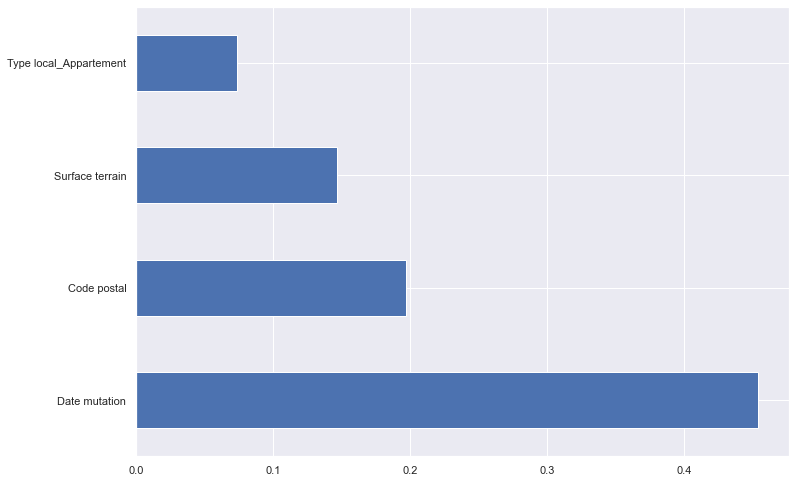

In [137]:
#Feature importance plot for winning model

feat_importances = pd.Series(model.feature_importances_, index=df_feature.columns)
feat_importances.nlargest(4).plot(kind='barh')

## Model-4 XGBoost Regression

In [93]:
## Reference for random search on xgboost
## https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
#tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
tuned_params = {'max_depth': [10,15], 'learning_rate': [0.01, 0.1], 'n_estimators': [500,600], 'reg_lambda': [100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

[15:08:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [10, 15],
                                        'n_estimators': [500, 600],
                                        'reg_lambda': [100.0]},
                   scoring='neg_mean_absolute_error')

In [94]:
model.best_estimator_

XGBRegressor(max_depth=15, n_estimators=500, reg_lambda=100.0)

In [95]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [96]:
## Predict Test results
y_pred = model.predict(X_test)

In [97]:
print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for XGBoost Regression:
*******************************
Root mean squared error:  691762.3439351016
R-squared:  0.930214375651957
Mean Absolute Error:  145032.92058217412


In [98]:
print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for XGBoost Regression:
*******************************
Root mean squared error:  1100200.542269258
R-squared:  0.7934491656819983
Mean Absolute Error:  238114.7999927208


### Feature Importance

In [99]:
## Building the model again with the best hyperparameters
model = XGBRegressor(learning_rate=0.01, max_depth=15, n_estimators=500,
             reg_lambda=100.0)
model.fit(X_train, y_train)

[15:12:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, max_depth=15, n_estimators=500,
             reg_lambda=100.0)

In [100]:
## Function to include figsize parameter
## Reference: https://stackoverflow.com/questions/40081888/xgboost-plot-importance-figure-size
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

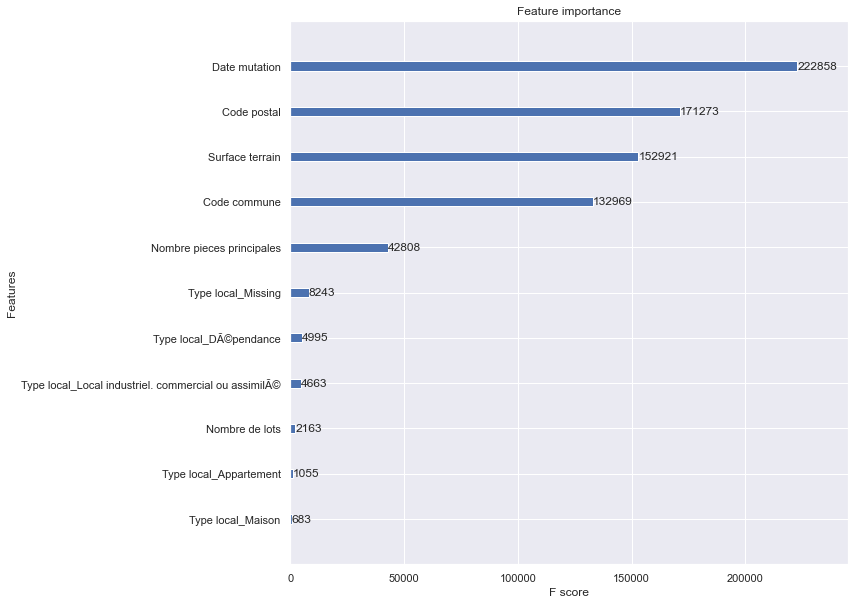

In [101]:
my_plot_importance(model, (10,10))

## Model-5 Lasso Regression

In [102]:
#tuned_params = {'alpha': [ 0.01, 0.1, 1, 10, 100, 1000, 10000]}
tuned_params = {'alpha': [1000, 10000]}
model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1000, 10000]},
             scoring='neg_mean_absolute_error')

In [103]:
model.best_estimator_

Lasso(alpha=10000)

In [104]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [105]:
## Predict Test results
y_pred = model.predict(X_test)

In [106]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  2597767.1214322266
R-squared:  0.015869786787994777
Mean Absolute Error:  428603.38362707384


In [107]:
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  2399898.425340274
R-squared:  0.017191359996098665
Mean Absolute Error:  418972.009729463


### Feature Importance

In [108]:
## Building the model again with the best hyperparameters
model = Lasso(alpha=10000)
model.fit(X_train, y_train)

Lasso(alpha=10000)

In [109]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Type local_Appartement
Type local_Missing
Type local_Maison
year
Nombre pieces principales
Date mutation
Code commune
Code postal
Surface terrain
Nombre de lots
Type local_DÃ©pendance
Type local_Local industriel. commercial ou assimilÃ©


## Model-6 Descision Tree Regression

In [110]:
tuned_params = {'min_samples_split': [2,4], 'min_samples_leaf': [5,10], 'max_depth': [10,15]}
model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [2, 4]},
                   scoring='neg_mean_absolute_error')

In [111]:
model.best_estimator_

DecisionTreeRegressor(max_depth=15, min_samples_leaf=5)

In [112]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [113]:
## Predict Test results
y_pred = model.predict(X_test)

In [114]:
print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  1266414.724518457
R-squared:  0.7661141025334538
Mean Absolute Error:  222370.62495006414


In [115]:
print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  1499296.4483168835
R-squared:  0.6164179563988177
Mean Absolute Error:  264544.0958419753


##  Model-7 Support Vector Regression
With an RBF Kernel

In [116]:
#tuned_params = {'C': [ 100, 1000,10000], 'gamma': [0.001, 0.01, 0.1]}
tuned_params = {'C': [100, 1000, 10000], 'gamma': [ 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes more time

In [117]:
#model.best_estimator_

In [118]:
## Building the model again with the best hyperparameters
model = SVR(C=100000, gamma=0.001)
model.fit(X_train, y_train)

SVR(C=100000, gamma=0.001)

In [119]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [120]:
## Predict Test results
y_pred = model.predict(X_test)

In [121]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  2614102.030160292
R-squared:  0.0034543401017321784
Mean Absolute Error:  235139.59466634927


In [122]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  2425329.977093606
R-squared:  -0.003748509948982459
Mean Absolute Error:  292657.5329466255


#### Unfortunately getting feature importance from RBF SVM is non trivial

## Model-8 KN Regression

In [123]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 3.


In [124]:
model = KNeighborsRegressor(n_neighbors = optimal_k)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [125]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [126]:
## Predict Test results
y_pred = model.predict(X_test)

In [127]:
print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for KN Regression:
*******************************
Root mean squared error:  1763648.2643676412
R-squared:  0.5463968268948811
Mean Absolute Error:  261636.11088170833


In [128]:
print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for KN Regression:
*******************************
Root mean squared error:  2076837.3107098104
R-squared:  0.2639824009852596
Mean Absolute Error:  371673.1070438333


## Compare all models

![title](Images/Result.jpg)



**From the above table, RMSE, R-squared, MAE for XGBoost Regressor is better(i.e RMSE and MAE is least and R-squared is more) than other models so XGBoost is the winning Model**

# Save the winning model to disk

In [138]:
import joblib
win_model = XGBRegressor(learning_rate=0.01, max_depth=15, n_estimators=500,
             reg_lambda=100.0)
win_model.fit(X_train, y_train)
with open('france_real_estate.pkl', 'wb') as pickle_file:
       joblib.dump(win_model, 'france_real_estate.pkl') 

[18:19:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<AxesSubplot:xlabel='Valeur fonciere'>

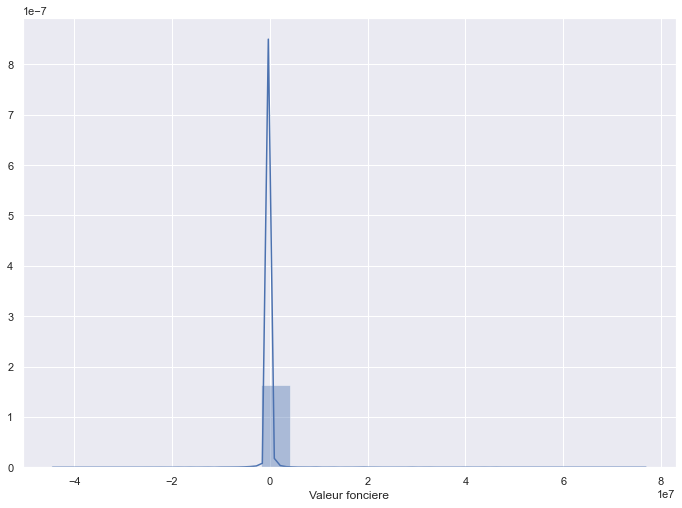

In [139]:
res = y_test - y_pred
sns.distplot(res, bins =20)

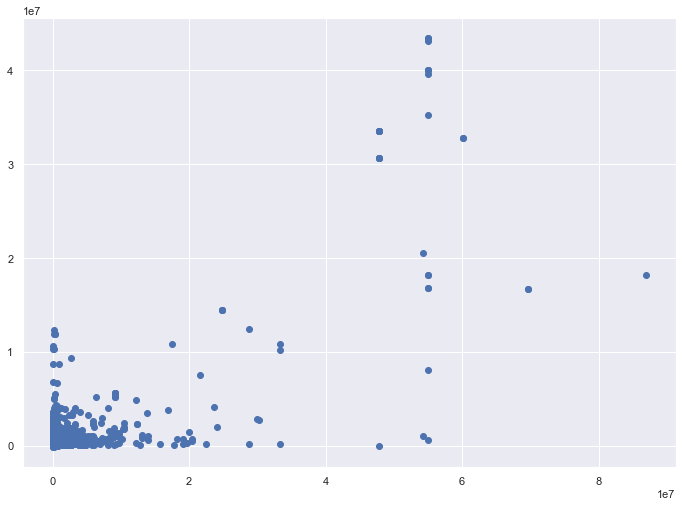

In [140]:
y_pred=win_model.predict(X_test)
plt.scatter(y_test, y_pred)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

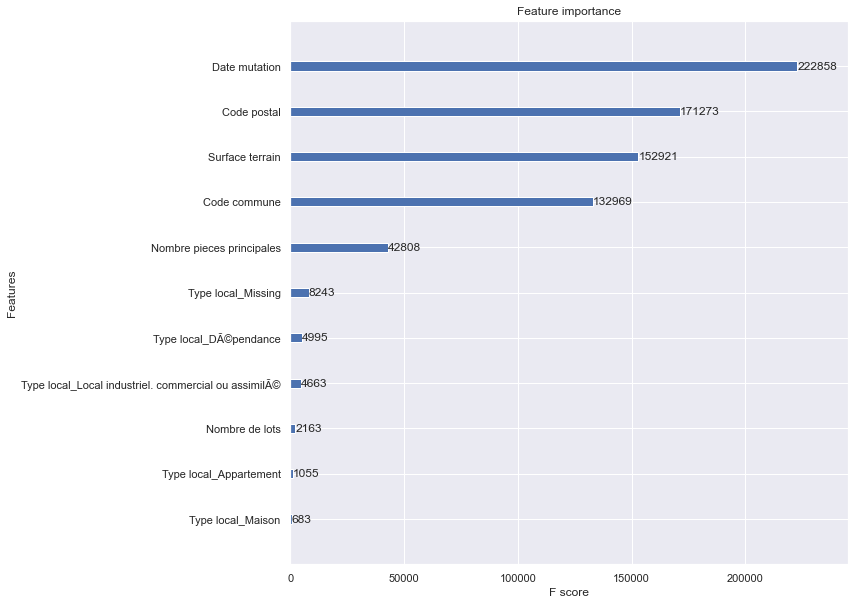

In [142]:
my_plot_importance(win_model, (10,10))

# Future Work
1.Dataset preprocessing must be improved further to produce better result.

2.Using only the top best important features with algorithm can improve model performance

3.Use different parameter with different values can also improve the model performance in future


# Conclusion

As our model performance is good still need a improvement in future.
We can improve analysis in order to find more best insights
We can use different set of features or can remove the feature which is used in above algorithms in order to get better result.
Features like Date Mutation,Address where it is(Code Postal),sqft,Number of rooms,Property type plays important role to decide the price of the land. 


# References
[1] DVF land valuation Dataset comes from certified public service :https://www.data.gouv.fr/en/datasets/demandes-de-valeurs-foncieres/

[2] Geographical Visualisation of DVF dataset by etalab :https://app.dvf.etalab.gouv.fr/

[3] Geocode with Python-How to Convert physical addresses to Geographic locations → Latitude and Longitude:https://towardsdatascience.com/geocode-with-python-161ec1e62b89

[4] Folium to visualise map data and Folium tooltip:https://python-visualization.github.io/folium/modules.html

[5] Relationships Using an EER Diagram:https://dev.mysql.com/doc/workbench/en/wb-relationship-tools.html